In [35]:
# let's assume we already have some data written by tool
# phout format - phantom and pandora can report in such a format

data = """
1482159938.776	#0	11001029	11001029	0	0	0	11000000	0	0	110	0
1482159939.307	#1	11000871	11000871	0	0	0	11000000	0	0	110	0
1482159939.613	#2	11000745	11000745	0	0	0	11000000	0	0	110	0
1482159939.854	#3	11000760	11000760	5	0	0	11000000	0	0	110	0
1482159940.058	#4	11000547	11000547	0	0	0	11000000	0	0	110	0
1482159940.238	#5	11000956	11000956	0	0	0	11000000	0	0	110	0
1482159940.402	#6	11000545	11000545	0	0	0	11000000	0	0	110	0
1482159940.553	#7	11000572	11000572	10	0	0	11000000	0	0	110	0
1482159940.694	#8	11000833	11000833	0	0	0	11000000	0	0	110	0
1482159940.827	#9	11000971	11000971	0	0	0	11000000	0	0	110	0
1482159940.952	#10	11001013	11001013	0	0	0	11000000	0	0	110	0
1482159941.071	#11	11001188	11001188	69	0	0	11000000	0	0	110	0
1482159941.185	#12	11000834	11000834	4	0	0	11000000	0	0	110	0
1482159941.295	#13	11001105	11001105	0	0	0	11000000	0	0	110	0
1482159941.400	#14	11000945	11000945	5	0	0	11000000	0	0	110	0
1482159941.502	#15	11000690	11000690	25	0	0	11000000	0	0	110	0
1482159941.600	#16	11001200	11001200	14	0	0	11000000	0	0	110	0
1482159941.696	#17	11001085	11001085	49	0	0	11000000	0	0	110	0
1482159941.788	#18	11000583	11000583	60	0	0	11000000	0	0	110	0
1482159941.878	#19	11000202	11000202	15	0	0	11000000	0	0	110	0
1482159941.966	#20	11000166	11000166	1	0	0	11000000	0	0	110	0
1482159942.052	#21	11000958	11000958	0	0	0	11000000	0	0	110	0
1482159942.136	#22	11000500	11000500	0	0	0	11000000	0	0	110	0
1482159942.217	#23	11000138	11000138	900	0	0	11000000	0	0	110	0
1482159942.297	#24	11000589	11000589	999	0	0	11000000	0	0	110	0
1482159942.376	#25	11000898	11000898	0	0	0	11000000	0	0	110	0
1482159942.453	#26	11001014	11001014	3	0	0	11000000	0	0	110	0
1482159942.528	#27	11000825	11000825	0	0	0	11000000	0	0	110	0
1482159942.602	#28	11000633	11000633	0	0	0	11000000	0	0	110	0
1482159942.675	#29	11000732	11000732	25	0	0	11000000	0	0	110	0
1482159942.745	#30	11000964	11000964	1	0	0	11000000	0	0	110	0
1482159942.817	#31	11000507	11000507	75	0	0	11000000	0	0	110	0
1482159942.886	#32	11000676	11000676	0	0	0	11000000	0	0	110	0
1482159942.954	#33	11001020	11001020	100	0	0	11000000	0	0	110	0
"""

In [36]:
# the order of data in phout
# https://github.com/yandex/yandex-tank/blob/master/yandextank/aggregator/aggregator.py#L9-L13
phout_columns = [
    'time', 'tag', 'interval_real', 'connect_time', 'send_time', 'latency',
    'receive_time', 'interval_event', 'size_out', 'size_in', 'net_code',
    'proto_code'
]



In [37]:
# Lets, for example, calculate a histogram for a chosen second

In [38]:
import pandas as pd
import numpy as np

In [39]:
# first of all, we define buckets for a histogram just like tanks' aggregator do
# the more time range for a query, the less precision we want
# so we start with a very small buckets (10µs accuracy) and finish with 1 second precision
# https://github.com/yandex/yandex-tank/blob/develop/yandextank/aggregator/aggregator.py#L35-L46
bins = np.linspace(0, 4990, 500)  # 10µs accuracy
bins = np.append(bins,
    np.linspace(5000, 9900, 50))  # 100µs accuracy
bins = np.append(bins,
    np.linspace(10, 499, 490) * 1000)  # 1ms accuracy
bins = np.append(bins,
    np.linspace(500, 2995, 500) * 1000)  # 5ms accuracy
bins = np.append(bins, np.linspace(3000, 9990, 700) * 1000)  # 10ms accuracy
bins = np.append(bins, np.linspace(10000, 29950, 400) * 1000)  # 50ms accuracy
bins = np.append(bins, np.linspace(30000, 119900, 900) * 1000)  # 100ms accuracy
bins = np.append(bins, np.linspace(120, 300, 181) * 1000000)  # 1s accuracy

In [40]:
from io import StringIO

# read the data into pandas DataFrame 
df = pd.read_csv(StringIO(data), sep='\t', names=phout_columns)
df

,time,tag,interval_real,connect_time,send_time,latency,receive_time,interval_event,size_out,size_in,net_code,proto_code
0,1.482160e+09,#0,11001029,11001029,0,0,0,11000000,0,0,110,0
1,1.482160e+09,#1,11000871,11000871,0,0,0,11000000,0,0,110,0
2,1.482160e+09,#2,11000745,11000745,0,0,0,11000000,0,0,110,0
3,1.482160e+09,#3,11000760,11000760,5,0,0,11000000,0,0,110,0
4,1.482160e+09,#4,11000547,11000547,0,0,0,11000000,0,0,110,0
5,1.482160e+09,#5,11000956,11000956,0,0,0,11000000,0,0,110,0
6,1.482160e+09,#6,11000545,11000545,0,0,0,11000000,0,0,110,0
7,1.482160e+09,#7,11000572,11000572,10,0,0,11000000,0,0,110,0
8,1.482160e+09,#8,11000833,11000833,0,0,0,11000000,0,0,110,0
9,1.482160e+09,#9,11000971,11000971,0,0,0,11000000,0,0,110,0


In [41]:
# cast timestamp to integer (so we discard decimal values)
df['time'] = df['time'].astype(int)

# then group by timestamp
grouped = df.groupby('time')

grouped

In [42]:
# let's see what groups we have after groupby 'time'
grouped.groups.keys()

dict_keys([1482159938, 1482159939, 1482159940, 1482159941, 1482159942])

In [43]:
# lets work with, for example, 1482159941 second
chosen_sec_df = grouped.get_group(1482159941)
chosen_sec_df

,time,tag,interval_real,connect_time,send_time,latency,receive_time,interval_event,size_out,size_in,net_code,proto_code
11,1482159941,#11,11001188,11001188,69,0,0,11000000,0,0,110,0
12,1482159941,#12,11000834,11000834,4,0,0,11000000,0,0,110,0
13,1482159941,#13,11001105,11001105,0,0,0,11000000,0,0,110,0
14,1482159941,#14,11000945,11000945,5,0,0,11000000,0,0,110,0
15,1482159941,#15,11000690,11000690,25,0,0,11000000,0,0,110,0
16,1482159941,#16,11001200,11001200,14,0,0,11000000,0,0,110,0
17,1482159941,#17,11001085,11001085,49,0,0,11000000,0,0,110,0
18,1482159941,#18,11000583,11000583,60,0,0,11000000,0,0,110,0
19,1482159941,#19,11000202,11000202,15,0,0,11000000,0,0,110,0
20,1482159941,#20,11000166,11000166,1,0,0,11000000,0,0,110,0


In [44]:
# for example, we want to get histogram for 'send_time' column
data, bins = np.histogram(chosen_sec_df['send_time'], bins=bins)

import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
# filter empty buckets
mask = data > 0
not_null_data = {
    "data": [e.item() for e in data[mask]],
    "bins": [e.item() for e in bins[1:][mask]],
}

In [46]:
not_null_data

{'data': [4, 2, 1, 1, 2], 'bins': [10.0, 20.0, 30.0, 50.0, 70.0]}

In [47]:
# so we get 
# 4 queries with send_time more than 0 and lower than 10us
# 2 queries with send_time more than 10us and lower than 20us
# and so on...

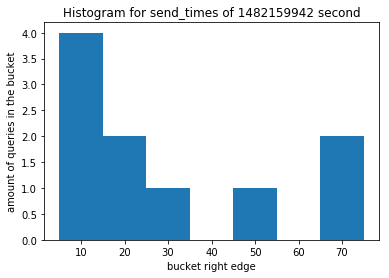

In [48]:
# let's just visualise that as a barplot histogram

plt.bar(not_null_data['bins'], not_null_data['data'], align='center', width = 10)
plt.ylabel('amount of queries in the bucket')
plt.xlabel('bucket right edge')
plt.title('Histogram for send_times of 1482159942 second')
plt.show()